In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.generalized_linear_model import GLM
from patsy import dmatrices
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df_diabetes = pd.read_csv("DrugsDiabetes.csv")
df_diabetes.head()

,ID,Pres,Drug,Age
0,1,26,A,Y
1,2,30,A,Y
2,3,54,A,Y
3,4,25,A,Y
4,5,70,A,Y


In [3]:
df_diabetes.describe()

,ID,Pres
count,54.000000,54.000000
mean,27.500000,28.148148
std,15.732133,13.198638
min,1.000000,10.000000
25%,14.250000,18.250000
50%,27.500000,26.000000
75%,40.750000,34.000000
max,54.000000,70.000000


In [4]:
df_diabetes.dtypes

ID       int64
Pres     int64
Drug    object
Age     object
dtype: object

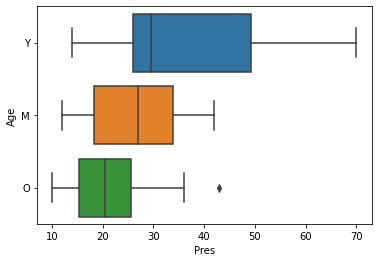

In [5]:
sns.boxplot(data=df_diabetes, x = "Pres", y = "Age")

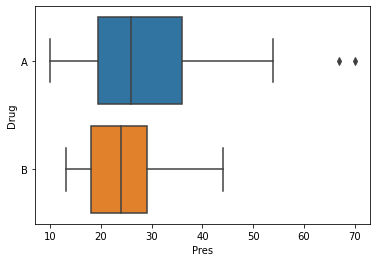

In [6]:
sns.boxplot(data=df_diabetes, x = "Pres", y = "Drug")

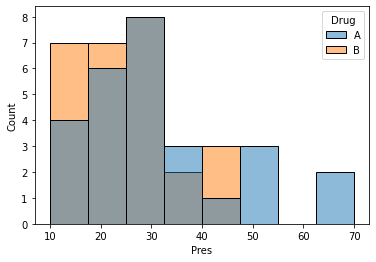

In [7]:
sns.histplot(data=df_diabetes, x="Pres", hue="Drug")

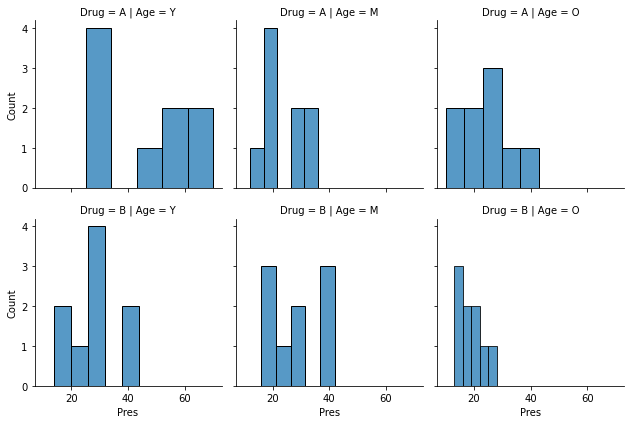

In [8]:
g = sns.FacetGrid(df_diabetes, col="Age", row="Drug")
g.map_dataframe(sns.histplot, x="Pres")

In [9]:
def model_Poisson(y,X):
    model = GLM(endog=y, exog=X, family=sm.families.Poisson())
    results = model.fit()
    return results

In [12]:
expr = """Pres ~ Drug"""
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
results=model_Poisson(y,X)
print(results.summary2())

              Results: Generalized linear model
Model:              GLM              AIC:            559.9975
Link Function:      log              BIC:            73.9063 
Dependent Variable: Pres             Log-Likelihood: -278.00 
Date:               2022-03-25 09:51 LL-Null:        -286.02 
No. Observations:   54               Deviance:       281.33  
Df Model:           1                Pearson chi2:   300.    
Df Residuals:       52               Scale:          1.0000  
Method:             IRLS                                     
-------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------
Intercept      3.4352   0.0345 99.4424 0.0000  3.3675  3.5029
Drug[T.B]     -0.2060   0.0516 -3.9943 0.0001 -0.3071 -0.1049



In [15]:
def residual_vs_fitted(results):
    residuals = results.resid_deviance
    fitted = results.fittedvalues
    smoothed = lowess(residuals,fitted)
    top3 = abs(residuals).sort_values(ascending = False)[:3]

    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (8,7)
    fig, ax = plt.subplots()
    ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
    ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax.set_ylabel('Residuals')
    ax.set_xlabel('Fitted Values')
    ax.set_title('Residuals vs. Fitted')
    ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

    for i in top3.index:
        ax.annotate(i,xy=(fitted[i],residuals[i]))

    return plt

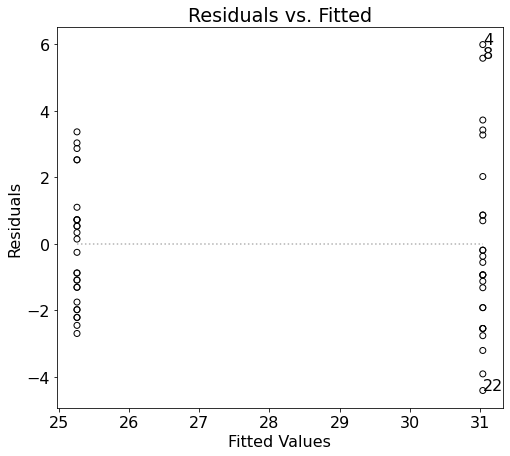

In [16]:
residual_vs_fitted(results).show()

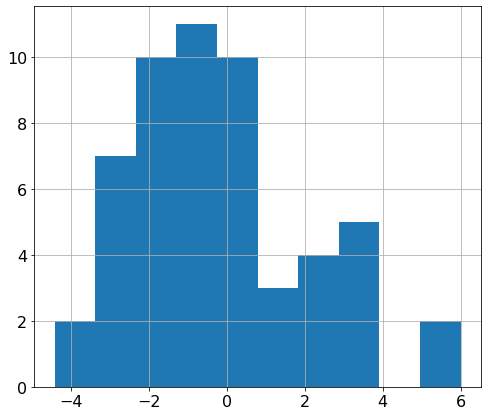

In [17]:
results.resid_deviance.hist()

In [18]:
expr = """Pres ~ Age """
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
results=model_Poisson(y,X)
print(results.summary2())

              Results: Generalized linear model
Model:              GLM              AIC:            507.0947
Link Function:      log              BIC:            22.9925 
Dependent Variable: Pres             Log-Likelihood: -250.55 
Date:               2022-03-25 09:55 LL-Null:        -286.02 
No. Observations:   54               Deviance:       226.43  
Df Model:           2                Pearson chi2:   235.    
Df Residuals:       51               Scale:          1.0000  
Method:             IRLS                                     
-------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------
Intercept      3.2729   0.0459 71.3321 0.0000  3.1830  3.3629
Age[T.O]      -0.1972   0.0683 -2.8854 0.0039 -0.3311 -0.0632
Age[T.Y]       0.3213   0.0603  5.3317 0.0000  0.2032  0.4394



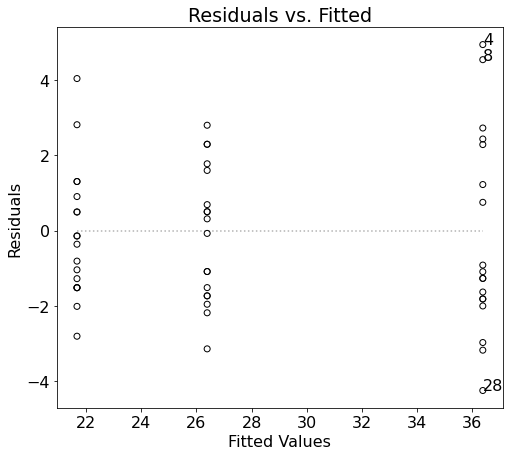

In [19]:
residual_vs_fitted(results).show()

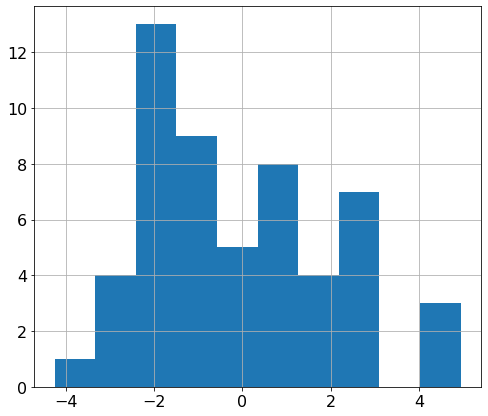

In [20]:
results.resid_deviance.hist()

In [21]:
expr = """Pres ~ Drug + Age"""
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
results=model_Poisson(y,X)
print(results.summary2())

              Results: Generalized linear model
Model:              GLM              AIC:            493.0560
Link Function:      log              BIC:            10.9427 
Dependent Variable: Pres             Log-Likelihood: -242.53 
Date:               2022-03-25 09:57 LL-Null:        -286.02 
No. Observations:   54               Deviance:       210.39  
Df Model:           3                Pearson chi2:   213.    
Df Residuals:       50               Scale:          1.0000  
Method:             IRLS                                     
-------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------
Intercept      3.3706   0.0514 65.5925 0.0000  3.2699  3.4714
Drug[T.B]     -0.2060   0.0516 -3.9943 0.0001 -0.3071 -0.1049
Age[T.O]      -0.1972   0.0683 -2.8854 0.0039 -0.3311 -0.0632
Age[T.Y]       0.3213   0.0603  5.3317 0.0000  0.2032  0.4394



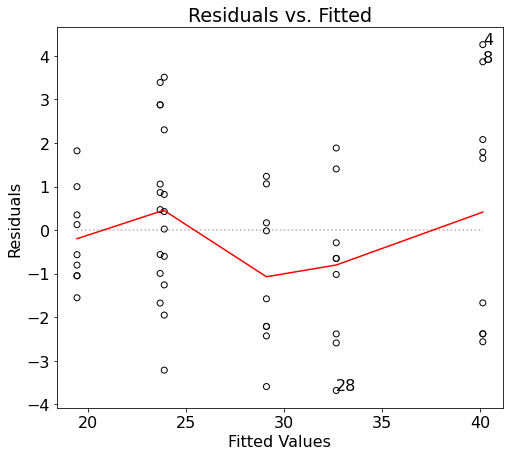

In [22]:
residual_vs_fitted(results).show()

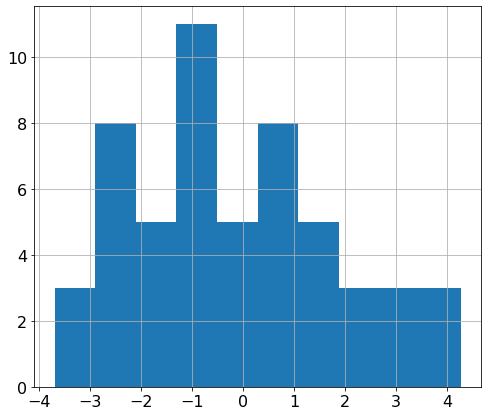

In [23]:
results.resid_deviance.hist()

In [24]:
expr = """Pres ~ Drug + Age + Drug*Age"""
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
results=model_Poisson(y,X)
print(results.summary2())

                Results: Generalized linear model
Model:                 GLM               AIC:             468.9692
Link Function:         log               BIC:             -9.1661 
Dependent Variable:    Pres              Log-Likelihood:  -228.48 
Date:                  2022-03-25 09:58  LL-Null:         -286.02 
No. Observations:      54                Deviance:        182.31  
Df Model:              5                 Pearson chi2:    181.    
Df Residuals:          48                Scale:           1.0000  
Method:                IRLS                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept           3.1781   0.0680 46.7077 0.0000  3.0447  3.3114
Drug[T.B]           0.1815   0.0921  1.9703 0.0488  0.0009  0.3621
Age[T.O]            0.0229   0.0957  0.2392 0.8110 -0.1646  0.2104
Age[T.Y]    

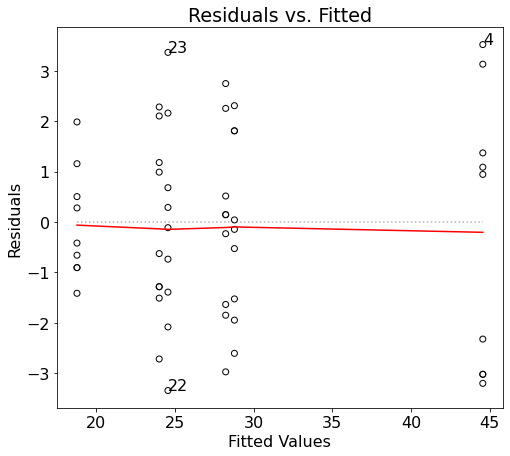

In [25]:
residual_vs_fitted(results).show()

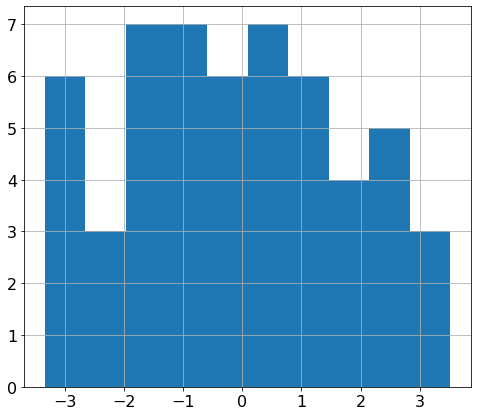

In [26]:
results.resid_deviance.hist()

In [27]:
## Negative Binomial
def model_NegBionomial(y,X):
    model = GLM(endog=y, exog=X, family=sm.families.NegativeBinomial())
    results = model.fit()
    return results

In [33]:
expr = """Pres ~ Drug"""
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
results = model_NegBionomial(y,X)
model_NegBionomial(y,X).summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            473.7920 
Link Function:      log              BIC:            -197.9756
Dependent Variable: Pres             Log-Likelihood: -234.90  
Date:               2022-03-25 10:05 LL-Null:        -235.17  
No. Observations:   54               Deviance:       9.4515   
Df Model:           1                Pearson chi2:   9.96     
Df Residuals:       52               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
---------------------------------------------------------------
Intercept    3.4352    0.1955  17.5689  0.0000   3.0520  3.8184
Drug[T.B]   -0.2060    0.2770  -0.7436  0.4571  -0.7489  0.3369
==============================================================

"""

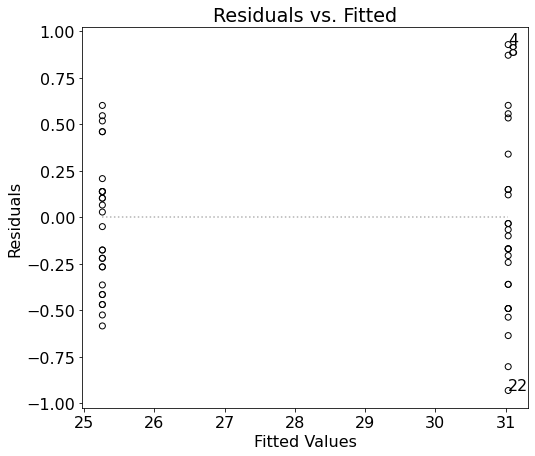

In [34]:
residual_vs_fitted(results).show()

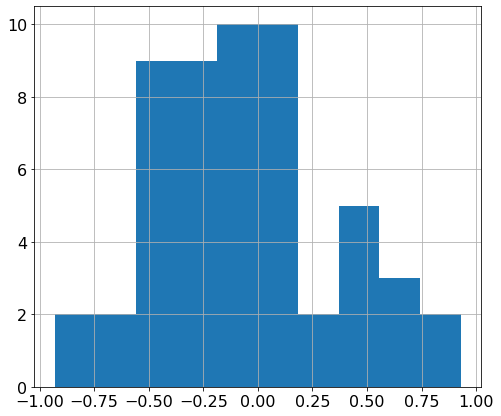

In [35]:
results.resid_deviance.hist()

In [36]:
expr = """Pres ~ Age"""
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
results = model_NegBionomial(y,X)
model_NegBionomial(y,X).summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            473.9294 
Link Function:      log              BIC:            -195.8492
Dependent Variable: Pres             Log-Likelihood: -233.96  
Date:               2022-03-25 10:05 LL-Null:        -235.17  
No. Observations:   54               Deviance:       7.5890   
Df Model:           2                Pearson chi2:   7.75     
Df Residuals:       51               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
---------------------------------------------------------------
Intercept    3.2729    0.2401  13.6301  0.0000   2.8023  3.7436
Age[T.O]    -0.1972    0.3403  -0.5795  0.5623  -0.8641  0.4697
Age[T.Y]     0.3213    0.3387   0.9486  0.3428  -0.3426  0.9852
==============================================================

"""

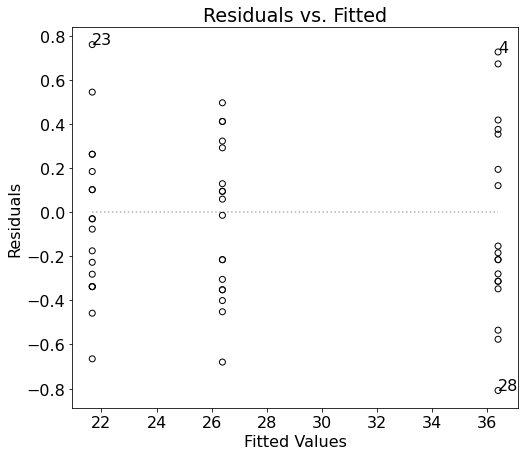

In [37]:
residual_vs_fitted(results).show()

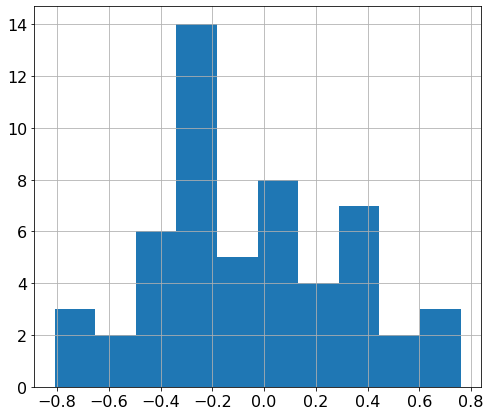

In [38]:
results.resid_deviance.hist()

In [39]:
expr = """Pres ~ Drug + Age"""
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
results = model_NegBionomial(y,X)
model_NegBionomial(y,X).summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            475.5045 
Link Function:      log              BIC:            -192.2852
Dependent Variable: Pres             Log-Likelihood: -233.75  
Date:               2022-03-25 10:06 LL-Null:        -235.17  
No. Observations:   54               Deviance:       7.1640   
Df Model:           3                Pearson chi2:   7.05     
Df Residuals:       50               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
---------------------------------------------------------------
Intercept    3.3759    0.2770  12.1872  0.0000   2.8330  3.9188
Drug[T.B]   -0.1823    0.2772  -0.6578  0.5107  -0.7257  0.3610
Age[T.O]    -0.2168    0.3403  -0.6371  0.5241  -0.8837  0.4502
Age[T.Y]     0.2934    0.3388   0.8662  0.3864  -0.3705  0.9574
==============================================================

"""

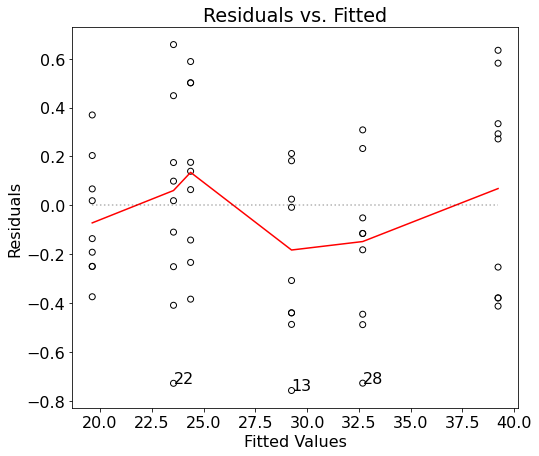

In [40]:
residual_vs_fitted(results).show()

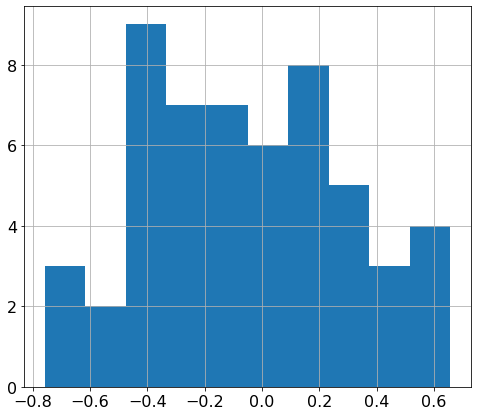

In [42]:
results.resid_deviance.hist()

In [43]:
expr = """Pres ~ Drug + Age + Drug*Age"""
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
results = model_NegBionomial(y,X)
model_NegBionomial(y,X).summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized linear model
=================================================================
Model:               GLM               AIC:             478.5735 
Link Function:       log               BIC:             -185.2382
Dependent Variable:  Pres              Log-Likelihood:  -233.29  
Date:                2022-03-25 10:07  LL-Null:         -235.17  
No. Observations:    54                Deviance:        6.2330   
Df Model:            5                 Pearson chi2:    5.93     
Df Residuals:        48                Scale:           1.0000   
Method:              IRLS                                        
-----------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
Intercept           3.1781   0.3402  9.3415 0.0000  2.5113 3.8448
Drug[T.B]           0.1815   0.4803  0.3780 0.7055 -0.7599 1.1230
Age[T.O]            0.0229   0.4810  0.0476 0.9621 -0.9199 0.9657
Age[T.Y]            0.6187   0.4789  1.2919 0.1964 -0.3199 1.5573
Drug[T.B]:Age[T.O] -0.4498   0.6807 -0.6608 0.5087 -1.7840 0.8844
Drug[T.B]:Age[T.Y] -0.6382   0.6778 -0.9416 0.3464 -1.9666 0.6902
=================================================================

"""

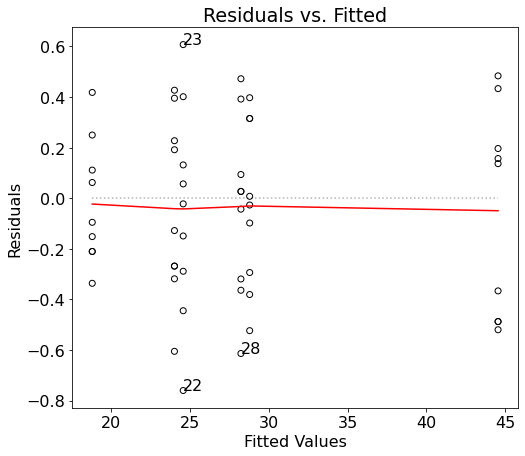

In [44]:
residual_vs_fitted(results).show()

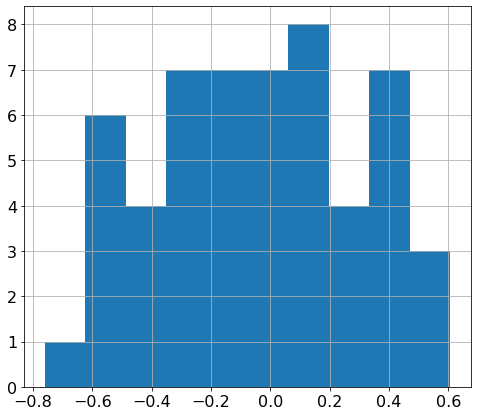

In [45]:
results.resid_deviance.hist()